In [1]:
import numpy as np

norms = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
values = [15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0]
n = len(norms)
np.random.seed(178231423)

numconflicts = 30
conflicts = []
while len(conflicts) < numconflicts:
    conflict = [np.random.choice(norms),np.random.choice(norms)]
    if conflict[0] != conflict[1]:
        if conflict not in conflicts:
            conflicts.append(conflict)
    
print(conflicts)

def lexposterior(norms,whendeclared,conflict):
    # Evaluate a norm according to arbitrary weak orderings
    index0 = norms.index(conflict[0])
    index1 = norms.index(conflict[1])
    if whendeclared[index0] > whendeclared[index1]:
        return 0
    elif whendeclared[index1] > whendeclared[index0]:
        return 1
    elif index0 > index1:
        return 0
    else:
        return 1
    
def colour_dsatur(vertices,edges):
    # colour a graph using dsatur algorithm
    
    colours = [None for i in range(len(vertices))]
    highestcolour = 0
    n = len(vertices) # number of vertices
    
    # get degrees of each vertex
    degrees = []
    flatedges = [i for x in edges for i in x]
    for i in range(len(vertices)):
        degree = 0
        for j in flatedges:
            if i==j:
                degree += 1
        degrees.append(degree)
    
    # find max-degree vertex
    maxdegree = 0
    maxdegreevertex = None
    for i in range(len(degrees)):
        if maxdegree < degrees[i]:
            maxdegree = degrees[i]
            maxdegreevertex = vertices[i]
    colours[maxdegreevertex] = 0
    
    while None in colours: # while not all vertices have been coloured
        
        # find a vertex with maximum degree of saturation
        dsaturlist = [None for i in range(n)]
        for i in range(n): # consider each vertex
            if colours[i] == None: # if current vertex is not yet coloured
                
                connectedcolours = []
                for edge in edges: # consider each edge
                    
                    if vertices[i] in edge: # if current vertex is in the edge
                        if edge[0] == vertices[i]: # consider colour of the other vertex in the edge
                            othercolour = colours[edge[1]]
                        else:
                            othercolour = colours[edge[0]]
                        if othercolour != None: # consider colour of other vertex
                            if othercolour not in connectedcolours:
                                connectedcolours.append(othercolour) # count colour of other vertex
                dsaturlist[i] = len(connectedcolours) # save degree of saturation of current vertex
        
        maxdsatur = max([i for i in dsaturlist if i != None]) # choose a vertex with maximal dsatur. break ties by choosing highest degree vertex
        maxdegree = 0
        for i in range(n):
            if dsaturlist[i] == maxdsatur and degrees[i] > maxdegree and colours[i] == None:
                maxdegree = degrees[i]
                vertextocolour = i
        if maxdegree == 0: # if the only remaining vertices are isolated
            for i in range(n): # just pick the isolated vertices in order of index
                if colours[i] == None:
                    vertextocolour = i
                    break
        
        # assign the vertex the lowest possible colour
        neighbouringcolours = []
        for edge in edges:
            if vertices[vertextocolour] in edge:
                if vertices[vertextocolour] == edge[0]:
                    othervertex = edge[1] # get other vertex in edge
                else:
                    othervertex = edge[0]
                if colours[othervertex] != None: # if neighbouring vertex has been coloured
                    if colours[othervertex] not in neighbouringcolours: # append colour to list of neighbouring colours
                        neighbouringcolours.append(colours[othervertex])
        for c in colours: # loop through each colour in order
            if c != None:
                if c not in neighbouringcolours: # check if colour can be used
                    colours[vertextocolour] = c
                    break
        else: # if no colour can be used
            colours[vertextocolour] = max([i for i in dsaturlist if i != None]) # create new colour
    return colours


def getcolourscores(vertices,edges,colouring):
    colours = list(range(max(colouring)+1))
    colourvalues = [0 for i in colours]

    for c in colours: # go through each colour
        for edge in conflicts: # find winner for each edge
            if colouring[edge[0]] == c or colouring[edge[1]] == c:
                winner = lexposterior(norms,values,edge)
                if winner == 0 and colouring[edge[0]] == c:
                    colourvalues[colours.index(c)] += 1
                elif winner == 1 and colouring[edge[0]] == c:
                    colourvalues[colours.index(c)] -= 1
                elif winner == 1 and colouring[edge[1]] == c:
                    colourvalues[colours.index(c)] += 1
                else:
                    colourvalues[colours.index(c)] -= 1
    return colourvalues

[[10, 15], [3, 1], [4, 2], [7, 4], [14, 13], [2, 10], [12, 10], [2, 13], [5, 6], [14, 5], [13, 3], [2, 12], [5, 1], [0, 8], [9, 3], [4, 10], [14, 0], [15, 4], [7, 15], [6, 1], [0, 2], [4, 12], [12, 15], [2, 14], [15, 8], [4, 9], [12, 1], [7, 13], [2, 5], [2, 3]]


In [2]:
colouring = colour_dsatur(norms,conflicts)
colours = list(range(max(colouring)+1))
scores = getcolourscores(norms,conflicts,colouring)
maxcolour = scores.index(max(scores))

print("scores:", scores)
print("best colour:", maxcolour)
admitset = []
for i in range(n):
    if colouring[i] == maxcolour:
        admitset.append(norms[i])
print("admitted norms:", admitset)

scores: [3, 5, -3, -5]
best colour: 1
admitted norms: [0, 4, 5, 11, 13]


In [17]:
'''
RUN TRIALS USING ARBITRARY WEAK ORDERING (i.e. lex superior, lex posterior, lex specialis, etc.)
'''


norms = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
values = [15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0]
n = len(norms)
np.random.seed(178231423)


resultscomplete = []
for numconflicts in range(1,121): # Perform a run of 10 trials for # of conflicts ranging from 1 to 240
    print("NUMCONFLICTS:", numconflicts)
    
    trialresults = []
    for trial in range(250):
        
         # Generate conflicts
        conflicts = []
        while len(conflicts) < numconflicts:
            conflict = [np.random.choice(norms),np.random.choice(norms)]
            reversed = [conflict[1],conflict[0]]
            if conflict[0] != conflict[1]:
                if conflict not in conflicts and reversed not in conflicts:
                    conflicts.append(conflict)

        # Colour conflict graph
        colouring = colour_dsatur(norms,conflicts)
        colours = list(range(max(colouring)+1))
        
        # Score each colour
        scores = getcolourscores(norms,conflicts,colouring)
        maxcolour = scores.index(max(scores))

        # Get a set of admitted norms
        admitset = []
        for i in range(n):
            if colouring[i] == maxcolour:
                admitset.append(norms[i])
                
        for i in range(n): # COMPLETE the extension. Remove this block of code to turn into ColourResolve
            for edge in conflicts:
                if (norms[i] in edge) and (edge[0] in admitset or edge[1] in admitset):
                    break
            else:
                if norms[i] not in admitset:
                    admitset.append(norms[i])
        
        finalscore = 0
        for i in range(n): # get the score of the admitted set
            if norms[i] in admitset: # go through each admitted norm
                for edge in conflicts:
                    if norms[i] in edge:
                        if norms[i] == edge[0]:
                            other = edge[1]
                        else:
                            other = edge[0]
                        if values[other] < values[i]:
                            finalscore += 1
                        else:
                            finalscore -= 1
        finalscore /= len(admitset) # Average the final score to be the average for a single vertex
            
                
        # Save the size of the admitted set as the result of the trial
        trialresults.append(finalscore)
    
    # Take the average for the entire trial
    resultscomplete.append(np.mean(trialresults))
    np.save("results-lexposterior-weakorder-complete.npy",resultscomplete)
    
print(resultscomplete)


NUMCONFLICTS: 1
NUMCONFLICTS: 2
NUMCONFLICTS: 3
NUMCONFLICTS: 4
NUMCONFLICTS: 5
NUMCONFLICTS: 6
NUMCONFLICTS: 7
NUMCONFLICTS: 8
NUMCONFLICTS: 9
NUMCONFLICTS: 10
NUMCONFLICTS: 11
NUMCONFLICTS: 12
NUMCONFLICTS: 13
NUMCONFLICTS: 14
NUMCONFLICTS: 15
NUMCONFLICTS: 16
NUMCONFLICTS: 17
NUMCONFLICTS: 18
NUMCONFLICTS: 19
NUMCONFLICTS: 20
NUMCONFLICTS: 21
NUMCONFLICTS: 22
NUMCONFLICTS: 23
NUMCONFLICTS: 24
NUMCONFLICTS: 25
NUMCONFLICTS: 26
NUMCONFLICTS: 27
NUMCONFLICTS: 28
NUMCONFLICTS: 29
NUMCONFLICTS: 30
NUMCONFLICTS: 31
NUMCONFLICTS: 32
NUMCONFLICTS: 33
NUMCONFLICTS: 34
NUMCONFLICTS: 35
NUMCONFLICTS: 36
NUMCONFLICTS: 37
NUMCONFLICTS: 38
NUMCONFLICTS: 39
NUMCONFLICTS: 40
NUMCONFLICTS: 41
NUMCONFLICTS: 42
NUMCONFLICTS: 43
NUMCONFLICTS: 44
NUMCONFLICTS: 45
NUMCONFLICTS: 46
NUMCONFLICTS: 47
NUMCONFLICTS: 48
NUMCONFLICTS: 49
NUMCONFLICTS: 50
NUMCONFLICTS: 51
NUMCONFLICTS: 52
NUMCONFLICTS: 53
NUMCONFLICTS: 54
NUMCONFLICTS: 55
NUMCONFLICTS: 56
NUMCONFLICTS: 57
NUMCONFLICTS: 58
NUMCONFLICTS: 59
NUMCON

In [18]:
'''
RUN TRIALS USING ARBITRARY WEAK ORDERING FOR NON-COMPLETE VERSION (i.e. lex superior, lex posterior, lex specialis, etc.)
'''


norms = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
values = [15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0]
n = len(norms)
np.random.seed(178231423)


results = []
for numconflicts in range(1,121): # Perform a run of 10 trials for # of conflicts ranging from 1 to 240
    print("NUMCONFLICTS:", numconflicts)
    
    trialresults = []
    for trial in range(250):
        
         # Generate conflicts
        conflicts = []
        while len(conflicts) < numconflicts:
            conflict = [np.random.choice(norms),np.random.choice(norms)]
            reversed = [conflict[1],conflict[0]]
            if conflict[0] != conflict[1]:
                if conflict not in conflicts and reversed not in conflicts:
                    conflicts.append(conflict)

        # Colour conflict graph
        colouring = colour_dsatur(norms,conflicts)
        colours = list(range(max(colouring)+1))
        
        # Score each colour
        scores = getcolourscores(norms,conflicts,colouring)
        maxcolour = scores.index(max(scores))

        # Get a set of admitted norms
        admitset = []
        for i in range(n):
            if colouring[i] == maxcolour:
                admitset.append(norms[i])
                
        
        finalscore = 0
        for i in range(n): # get the score of the admitted set
            if norms[i] in admitset: # go through each admitted norm
                for edge in conflicts:
                    if norms[i] in edge:
                        if norms[i] == edge[0]:
                            other = edge[1]
                        else:
                            other = edge[0]
                        if values[other] < values[i]:
                            finalscore += 1
                        else:
                            finalscore -= 1
        finalscore /= len(admitset) # Average the final score to be the average for a single vertex
            
                
        # Save the size of the admitted set as the result of the trial
        trialresults.append(finalscore)
    
    # Take the average for the entire trial
    results.append(np.mean(trialresults))
    np.save("results-lexposterior-weakorder.npy",results)
    
print(results)

NUMCONFLICTS: 1
NUMCONFLICTS: 2
NUMCONFLICTS: 3
NUMCONFLICTS: 4
NUMCONFLICTS: 5
NUMCONFLICTS: 6
NUMCONFLICTS: 7
NUMCONFLICTS: 8
NUMCONFLICTS: 9
NUMCONFLICTS: 10
NUMCONFLICTS: 11
NUMCONFLICTS: 12
NUMCONFLICTS: 13
NUMCONFLICTS: 14
NUMCONFLICTS: 15
NUMCONFLICTS: 16
NUMCONFLICTS: 17
NUMCONFLICTS: 18
NUMCONFLICTS: 19
NUMCONFLICTS: 20
NUMCONFLICTS: 21
NUMCONFLICTS: 22
NUMCONFLICTS: 23
NUMCONFLICTS: 24
NUMCONFLICTS: 25
NUMCONFLICTS: 26
NUMCONFLICTS: 27
NUMCONFLICTS: 28
NUMCONFLICTS: 29
NUMCONFLICTS: 30
NUMCONFLICTS: 31
NUMCONFLICTS: 32
NUMCONFLICTS: 33
NUMCONFLICTS: 34
NUMCONFLICTS: 35
NUMCONFLICTS: 36
NUMCONFLICTS: 37
NUMCONFLICTS: 38
NUMCONFLICTS: 39
NUMCONFLICTS: 40
NUMCONFLICTS: 41
NUMCONFLICTS: 42
NUMCONFLICTS: 43
NUMCONFLICTS: 44
NUMCONFLICTS: 45
NUMCONFLICTS: 46
NUMCONFLICTS: 47
NUMCONFLICTS: 48
NUMCONFLICTS: 49
NUMCONFLICTS: 50
NUMCONFLICTS: 51
NUMCONFLICTS: 52
NUMCONFLICTS: 53
NUMCONFLICTS: 54
NUMCONFLICTS: 55
NUMCONFLICTS: 56
NUMCONFLICTS: 57
NUMCONFLICTS: 58
NUMCONFLICTS: 59
NUMCON

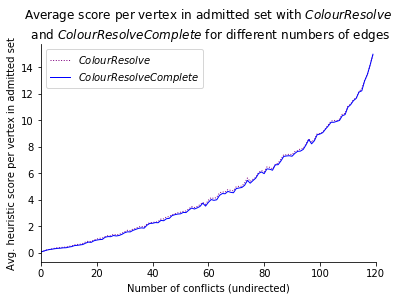

In [19]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(results, label="$ColourResolve$",linewidth=1, c="purple",linestyle=":")
plt.plot(resultscomplete, label="$ColourResolveComplete$",linewidth=1, c="blue")
#plt.plot(results_maxheur, label="Maximal colour class heuristic", c="red",linewidth=1)
plt.xlim((0,120))
plt.xlabel("Number of conflicts (undirected)")
plt.ylabel("Avg. heuristic score per vertex in admitted set")
plt.title("Average score per vertex in admitted set with $ColourResolve$\n and $ColourResolveComplete$ for different numbers of edges")
plt.legend()
plt.savefig("results-weakorder.png",transparent=True,dpi=1000)
plt.savefig("results-weakorder.svg")

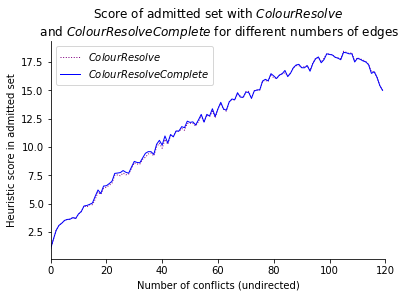

In [16]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(results, label="$ColourResolve$",linewidth=1, c="purple",linestyle=":")
plt.plot(resultscomplete, label="$ColourResolveComplete$",linewidth=1, c="blue")
#plt.plot(results_maxheur, label="Maximal colour class heuristic", c="red",linewidth=1)
plt.xlim((0,120))
plt.xlabel("Number of conflicts (undirected)")
plt.ylabel("Heuristic score in admitted set")
plt.title("Score of admitted set with $ColourResolve$\n and $ColourResolveComplete$ for different numbers of edges")
plt.legend()
plt.savefig("results-weakorder-sum.png",transparent=True,dpi=1000)
plt.savefig("results-weakorder-sum.svg")

In [ ]:
# ColourResolve - ordering [15.0, 14.0, 13.4, 11.9, 10.9, 9.2, 9.0, 9.7, 9.3, 8.5, 7.7, 8.9, 8.8, 8.1, 7.5, 7.0, 6.8, 7.1, 7.0, 6.1, 7.1, 6.3, 6.9, 5.7, 6.0, 5.4, 5.9, 5.3, 5.6, 5.6, 6.1, 5.8, 5.6, 5.6, 5.8, 5.1, 4.7, 4.9, 5.1, 5.4, 4.3, 4.0, 4.8, 4.9, 4.5, 4.7, 4.3, 4.7, 4.0, 4.8, 4.5, 3.9, 4.6, 4.7, 3.9, 4.1, 4.2, 3.8, 4.2, 3.7, 4.1, 3.9, 3.8, 4.4, 4.1, 3.8, 3.5, 3.7, 3.6, 3.3, 3.8, 3.0, 3.4, 3.5, 3.4, 3.2, 3.5, 3.0, 3.7, 3.5, 3.1, 3.2, 3.2, 3.2, 3.2, 2.9, 3.3, 3.2, 2.9, 3.0, 3.3, 2.8, 3.1, 2.9, 2.9, 2.7, 2.8, 2.7, 2.8, 2.6, 3.0, 2.9, 2.7, 2.5, 2.5, 2.8, 2.3, 2.8, 2.7, 2.3, 2.6, 2.8, 2.7, 2.2, 2.6, 2.7, 2.4, 2.6, 2.4, 2.3, 2.5, 2.4, 2.5, 2.4, 2.3, 2.0, 2.0, 2.3, 2.3, 2.2, 2.2, 2.3, 2.2, 2.2, 2.1, 2.2, 2.1, 2.4, 2.2, 2.1, 2.1, 2.1, 1.9, 2.2, 2.1, 2.2, 1.9, 1.9, 1.9, 1.9, 2.0, 2.1, 1.9, 1.9, 2.1, 1.8, 1.9, 1.7, 2.0, 1.7, 2.1, 1.9, 1.6, 1.7, 1.8, 1.7, 1.8, 1.7, 1.8, 1.7, 1.7, 1.8, 1.8, 1.6, 1.6, 1.8, 1.7, 1.8, 1.6, 1.7, 1.7, 1.7, 1.8, 1.6, 1.4, 1.9, 1.6, 1.7, 1.8, 1.4, 1.6, 1.5, 1.5, 1.7, 1.2, 1.5, 1.3, 1.4, 1.7, 1.3, 1.3, 1.4, 1.4, 1.4, 1.3, 1.1, 1.3, 1.3, 1.2, 1.4, 1.0, 1.2, 1.3, 1.3, 1.0, 1.2, 1.0, 1.2, 1.2, 1.1, 1.2, 1.2, 1.0, 1.1, 1.0, 1.0, 1.0, 1.0, 1.1, 1.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# ColourResolve - maximal [15.0, 14.0, 13.4, 12.9, 11.9, 11.4, 11.0, 10.3, 10.5, 10.1, 9.4, 9.0, 9.5, 8.8, 8.2, 8.1, 8.4, 7.8, 8.2, 8.0, 7.3, 7.3, 7.3, 7.3, 6.9, 7.0, 6.8, 7.0, 6.4, 6.5, 6.4, 6.5, 6.6, 6.5, 6.4, 6.0, 6.3, 6.1, 6.0, 6.2, 5.8, 5.5, 5.4, 5.5, 5.6, 5.5, 5.0, 5.2, 5.3, 5.1, 5.1, 5.0, 5.3, 5.0, 4.9, 4.7, 4.8, 4.8, 4.5, 4.5, 4.4, 4.5, 4.5, 4.8, 4.4, 4.5, 4.6, 4.4, 4.3, 4.5, 4.1, 4.1, 4.2, 4.3, 3.9, 4.3, 4.1, 4.1, 3.9, 4.1, 4.1, 4.0, 3.9, 3.9, 4.0, 3.7, 3.7, 3.5, 3.7, 3.6, 3.7, 3.4, 3.5, 3.6, 3.3, 3.4, 3.5, 3.2, 3.6, 3.4, 3.5, 3.3, 3.3, 3.4, 3.4, 3.2, 3.3, 3.3, 3.5, 3.0, 3.2, 3.0, 3.1, 3.4, 3.1, 3.3, 3.4, 3.1, 3.3, 2.9, 3.0, 3.1, 3.1, 3.1, 3.1, 2.8, 2.9, 3.1, 2.7, 2.8, 3.0, 2.8, 2.7, 2.9, 2.8, 2.9, 2.8, 2.7, 2.7, 2.4, 2.5, 2.5, 2.4, 2.7, 2.8, 2.6, 2.7, 2.4, 2.5, 2.4, 2.5, 2.4, 2.4, 2.4, 2.5, 2.3, 2.8, 2.3, 2.2, 2.2, 2.1, 2.2, 2.2, 2.4, 2.1, 2.2, 2.0, 2.0, 2.4, 2.1, 2.2, 2.0, 2.0, 2.0, 2.2, 2.0, 2.0, 2.2, 2.0, 2.0, 2.0, 2.1, 2.1, 2.1, 2.1, 2.0, 2.0, 2.0, 2.0, 2.1, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.9, 1.9, 1.9, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.9, 1.9, 1.9, 1.8, 1.7, 1.7, 1.8, 1.7, 1.8, 1.7, 1.8, 1.3, 1.3, 1.5, 1.1, 1.5, 1.5, 1.1, 1.3, 1.3, 1.4, 1.3, 1.1, 1.0, 1.0, 1.3, 1.0, 1.0, 1.1, 1.0, 1.0, 1.0]
# ColourResolveComplete - ordering [15.0, 14.0, 13.4, 12.9, 11.7, 11.5, 11.1, 10.8, 10.2, 9.7, 9.2, 9.1, 9.7, 8.6, 8.5, 8.2, 8.0, 7.9, 7.9, 7.5, 7.1, 7.4, 7.2, 7.1, 6.9, 6.7, 6.6, 6.1, 5.9, 5.8, 6.2, 5.8, 6.2, 6.0, 6.1, 5.6, 5.3, 5.7, 5.5, 5.9, 5.0, 4.7, 4.9, 5.1, 4.8, 4.8, 4.4, 5.0, 4.3, 4.8, 4.6, 4.1, 4.8, 4.7, 4.1, 4.1, 4.3, 4.1, 4.3, 4.1, 4.3, 4.0, 4.1, 4.5, 4.2, 3.9, 3.7, 4.0, 3.8, 3.6, 3.8, 3.5, 3.6, 3.5, 3.5, 3.4, 3.6, 3.4, 3.8, 3.5, 3.1, 3.3, 3.3, 3.3, 3.5, 3.0, 3.3, 3.3, 3.3, 3.1, 3.4, 3.0, 3.1, 2.9, 3.0, 2.8, 3.1, 2.9, 2.8, 2.7, 3.1, 2.9, 2.7, 2.5, 2.5, 2.8, 2.3, 2.8, 2.8, 2.4, 2.8, 2.8, 2.7, 2.5, 2.6, 2.9, 2.4, 2.8, 2.4, 2.3, 2.5, 2.5, 2.5, 2.5, 2.4, 2.1, 2.2, 2.3, 2.3, 2.2, 2.2, 2.3, 2.2, 2.4, 2.1, 2.2, 2.1, 2.4, 2.2, 2.1, 2.2, 2.2, 1.9, 2.2, 2.1, 2.4, 1.9, 1.9, 1.9, 2.0, 2.0, 2.1, 1.9, 1.9, 2.1, 1.9, 2.0, 1.7, 2.0, 1.9, 2.1, 1.9, 1.7, 1.8, 1.8, 1.7, 1.8, 1.7, 1.8, 1.7, 1.7, 1.8, 1.8, 1.6, 1.6, 1.8, 1.7, 1.8, 1.6, 1.7, 1.7, 1.7, 1.8, 1.7, 1.4, 1.9, 1.6, 1.7, 1.8, 1.4, 1.6, 1.5, 1.6, 1.7, 1.2, 1.5, 1.3, 1.4, 1.7, 1.3, 1.3, 1.4, 1.4, 1.4, 1.3, 1.1, 1.3, 1.3, 1.2, 1.4, 1.0, 1.2, 1.3, 1.3, 1.0, 1.2, 1.0, 1.2, 1.2, 1.1, 1.2, 1.2, 1.0, 1.1, 1.0, 1.0, 1.0, 1.0, 1.1, 1.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# ColourResolveComplete - maximal [15.0, 14.0, 13.4, 12.9, 11.9, 11.4, 11.0, 10.3, 10.5, 10.1, 9.6, 9.0, 9.5, 8.8, 8.4, 8.3, 8.8, 8.0, 8.6, 8.1, 7.3, 7.7, 7.4, 7.3, 7.2, 7.4, 7.0, 7.1, 6.5, 6.5, 6.7, 6.6, 6.8, 6.6, 6.6, 6.3, 6.3, 6.2, 6.0, 6.3, 6.1, 5.8, 5.8, 5.5, 5.6, 5.6, 5.0, 5.3, 5.5, 5.1, 5.2, 5.1, 5.4, 5.0, 5.1, 4.8, 4.8, 4.8, 4.6, 4.6, 4.5, 4.5, 4.5, 4.8, 4.4, 4.5, 4.6, 4.6, 4.3, 4.6, 4.1, 4.3, 4.3, 4.3, 3.9, 4.3, 4.1, 4.1, 3.9, 4.2, 4.1, 4.0, 3.9, 3.9, 4.1, 3.7, 3.7, 3.6, 3.7, 3.6, 3.7, 3.4, 3.5, 3.6, 3.3, 3.4, 3.5, 3.2, 3.6, 3.5, 3.5, 3.3, 3.3, 3.4, 3.4, 3.2, 3.3, 3.3, 3.6, 3.2, 3.3, 3.0, 3.1, 3.4, 3.1, 3.3, 3.4, 3.1, 3.3, 2.9, 3.0, 3.2, 3.1, 3.1, 3.1, 2.8, 2.9, 3.1, 2.7, 2.8, 3.0, 2.8, 2.7, 2.9, 2.9, 2.9, 2.8, 2.7, 2.7, 2.4, 2.5, 2.5, 2.4, 2.7, 2.8, 2.6, 2.7, 2.4, 2.5, 2.4, 2.5, 2.4, 2.4, 2.4, 2.5, 2.3, 2.8, 2.3, 2.2, 2.3, 2.1, 2.2, 2.2, 2.4, 2.1, 2.2, 2.0, 2.0, 2.4, 2.1, 2.2, 2.0, 2.0, 2.0, 2.2, 2.1, 2.0, 2.2, 2.0, 2.0, 2.0, 2.1, 2.1, 2.1, 2.1, 2.0, 2.0, 2.0, 2.0, 2.1, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.9, 1.9, 1.9, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.9, 1.9, 1.9, 1.8, 1.7, 1.7, 1.8, 1.7, 1.8, 1.7, 1.8, 1.3, 1.3, 1.5, 1.1, 1.5, 1.5, 1.1, 1.3, 1.3, 1.4, 1.3, 1.1, 1.0, 1.0, 1.3, 1.0, 1.0, 1.1, 1.0, 1.0, 1.0]

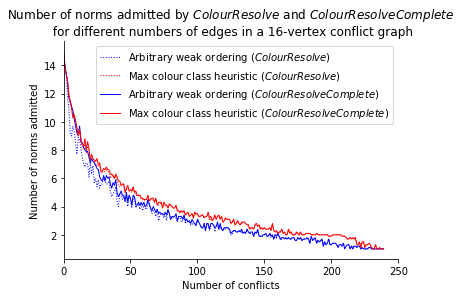

In [22]:
# Results for ColourResolve under weak ordering
cr_order = [15.0, 14.0, 13.4, 11.9, 10.9, 9.2, 9.0, 9.7, 9.3, 8.5, 7.7, 8.9, 8.8, 8.1, 7.5, 7.0, 6.8, 7.1, 7.0, 6.1, 7.1, 6.3, 6.9, 5.7, 6.0, 5.4, 5.9, 5.3, 5.6, 5.6, 6.1, 5.8, 5.6, 5.6, 5.8, 5.1, 4.7, 4.9, 5.1, 5.4, 4.3, 4.0, 4.8, 4.9, 4.5, 4.7, 4.3, 4.7, 4.0, 4.8, 4.5, 3.9, 4.6, 4.7, 3.9, 4.1, 4.2, 3.8, 4.2, 3.7, 4.1, 3.9, 3.8, 4.4, 4.1, 3.8, 3.5, 3.7, 3.6, 3.3, 3.8, 3.0, 3.4, 3.5, 3.4, 3.2, 3.5, 3.0, 3.7, 3.5, 3.1, 3.2, 3.2, 3.2, 3.2, 2.9, 3.3, 3.2, 2.9, 3.0, 3.3, 2.8, 3.1, 2.9, 2.9, 2.7, 2.8, 2.7, 2.8, 2.6, 3.0, 2.9, 2.7, 2.5, 2.5, 2.8, 2.3, 2.8, 2.7, 2.3, 2.6, 2.8, 2.7, 2.2, 2.6, 2.7, 2.4, 2.6, 2.4, 2.3, 2.5, 2.4, 2.5, 2.4, 2.3, 2.0, 2.0, 2.3, 2.3, 2.2, 2.2, 2.3, 2.2, 2.2, 2.1, 2.2, 2.1, 2.4, 2.2, 2.1, 2.1, 2.1, 1.9, 2.2, 2.1, 2.2, 1.9, 1.9, 1.9, 1.9, 2.0, 2.1, 1.9, 1.9, 2.1, 1.8, 1.9, 1.7, 2.0, 1.7, 2.1, 1.9, 1.6, 1.7, 1.8, 1.7, 1.8, 1.7, 1.8, 1.7, 1.7, 1.8, 1.8, 1.6, 1.6, 1.8, 1.7, 1.8, 1.6, 1.7, 1.7, 1.7, 1.8, 1.6, 1.4, 1.9, 1.6, 1.7, 1.8, 1.4, 1.6, 1.5, 1.5, 1.7, 1.2, 1.5, 1.3, 1.4, 1.7, 1.3, 1.3, 1.4, 1.4, 1.4, 1.3, 1.1, 1.3, 1.3, 1.2, 1.4, 1.0, 1.2, 1.3, 1.3, 1.0, 1.2, 1.0, 1.2, 1.2, 1.1, 1.2, 1.2, 1.0, 1.1, 1.0, 1.0, 1.0, 1.0, 1.1, 1.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# Results for ColourResolve under maximal colour class heuristic
cr_max =  [15.0, 14.0, 13.4, 12.9, 11.9, 11.4, 11.0, 10.3, 10.5, 10.1, 9.4, 9.0, 9.5, 8.8, 8.2, 8.1, 8.4, 7.8, 8.2, 8.0, 7.3, 7.3, 7.3, 7.3, 6.9, 7.0, 6.8, 7.0, 6.4, 6.5, 6.4, 6.5, 6.6, 6.5, 6.4, 6.0, 6.3, 6.1, 6.0, 6.2, 5.8, 5.5, 5.4, 5.5, 5.6, 5.5, 5.0, 5.2, 5.3, 5.1, 5.1, 5.0, 5.3, 5.0, 4.9, 4.7, 4.8, 4.8, 4.5, 4.5, 4.4, 4.5, 4.5, 4.8, 4.4, 4.5, 4.6, 4.4, 4.3, 4.5, 4.1, 4.1, 4.2, 4.3, 3.9, 4.3, 4.1, 4.1, 3.9, 4.1, 4.1, 4.0, 3.9, 3.9, 4.0, 3.7, 3.7, 3.5, 3.7, 3.6, 3.7, 3.4, 3.5, 3.6, 3.3, 3.4, 3.5, 3.2, 3.6, 3.4, 3.5, 3.3, 3.3, 3.4, 3.4, 3.2, 3.3, 3.3, 3.5, 3.0, 3.2, 3.0, 3.1, 3.4, 3.1, 3.3, 3.4, 3.1, 3.3, 2.9, 3.0, 3.1, 3.1, 3.1, 3.1, 2.8, 2.9, 3.1, 2.7, 2.8, 3.0, 2.8, 2.7, 2.9, 2.8, 2.9, 2.8, 2.7, 2.7, 2.4, 2.5, 2.5, 2.4, 2.7, 2.8, 2.6, 2.7, 2.4, 2.5, 2.4, 2.5, 2.4, 2.4, 2.4, 2.5, 2.3, 2.8, 2.3, 2.2, 2.2, 2.1, 2.2, 2.2, 2.4, 2.1, 2.2, 2.0, 2.0, 2.4, 2.1, 2.2, 2.0, 2.0, 2.0, 2.2, 2.0, 2.0, 2.2, 2.0, 2.0, 2.0, 2.1, 2.1, 2.1, 2.1, 2.0, 2.0, 2.0, 2.0, 2.1, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.9, 1.9, 1.9, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.9, 1.9, 1.9, 1.8, 1.7, 1.7, 1.8, 1.7, 1.8, 1.7, 1.8, 1.3, 1.3, 1.5, 1.1, 1.5, 1.5, 1.1, 1.3, 1.3, 1.4, 1.3, 1.1, 1.0, 1.0, 1.3, 1.0, 1.0, 1.1, 1.0, 1.0, 1.0]
# Results for ColourResolveComplete under weak ordering
crc_order =  [15.0, 14.0, 13.4, 12.9, 11.7, 11.5, 11.1, 10.8, 10.2, 9.7, 9.2, 9.1, 9.7, 8.6, 8.5, 8.2, 8.0, 7.9, 7.9, 7.5, 7.1, 7.4, 7.2, 7.1, 6.9, 6.7, 6.6, 6.1, 5.9, 5.8, 6.2, 5.8, 6.2, 6.0, 6.1, 5.6, 5.3, 5.7, 5.5, 5.9, 5.0, 4.7, 4.9, 5.1, 4.8, 4.8, 4.4, 5.0, 4.3, 4.8, 4.6, 4.1, 4.8, 4.7, 4.1, 4.1, 4.3, 4.1, 4.3, 4.1, 4.3, 4.0, 4.1, 4.5, 4.2, 3.9, 3.7, 4.0, 3.8, 3.6, 3.8, 3.5, 3.6, 3.5, 3.5, 3.4, 3.6, 3.4, 3.8, 3.5, 3.1, 3.3, 3.3, 3.3, 3.5, 3.0, 3.3, 3.3, 3.3, 3.1, 3.4, 3.0, 3.1, 2.9, 3.0, 2.8, 3.1, 2.9, 2.8, 2.7, 3.1, 2.9, 2.7, 2.5, 2.5, 2.8, 2.3, 2.8, 2.8, 2.4, 2.8, 2.8, 2.7, 2.5, 2.6, 2.9, 2.4, 2.8, 2.4, 2.3, 2.5, 2.5, 2.5, 2.5, 2.4, 2.1, 2.2, 2.3, 2.3, 2.2, 2.2, 2.3, 2.2, 2.4, 2.1, 2.2, 2.1, 2.4, 2.2, 2.1, 2.2, 2.2, 1.9, 2.2, 2.1, 2.4, 1.9, 1.9, 1.9, 2.0, 2.0, 2.1, 1.9, 1.9, 2.1, 1.9, 2.0, 1.7, 2.0, 1.9, 2.1, 1.9, 1.7, 1.8, 1.8, 1.7, 1.8, 1.7, 1.8, 1.7, 1.7, 1.8, 1.8, 1.6, 1.6, 1.8, 1.7, 1.8, 1.6, 1.7, 1.7, 1.7, 1.8, 1.7, 1.4, 1.9, 1.6, 1.7, 1.8, 1.4, 1.6, 1.5, 1.6, 1.7, 1.2, 1.5, 1.3, 1.4, 1.7, 1.3, 1.3, 1.4, 1.4, 1.4, 1.3, 1.1, 1.3, 1.3, 1.2, 1.4, 1.0, 1.2, 1.3, 1.3, 1.0, 1.2, 1.0, 1.2, 1.2, 1.1, 1.2, 1.2, 1.0, 1.1, 1.0, 1.0, 1.0, 1.0, 1.1, 1.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# Results for ColourResolveComplete under maximal colour class heuristic
crc_max = [15.0, 14.0, 13.4, 12.9, 11.9, 11.4, 11.0, 10.3, 10.5, 10.1, 9.6, 9.0, 9.5, 8.8, 8.4, 8.3, 8.8, 8.0, 8.6, 8.1, 7.3, 7.7, 7.4, 7.3, 7.2, 7.4, 7.0, 7.1, 6.5, 6.5, 6.7, 6.6, 6.8, 6.6, 6.6, 6.3, 6.3, 6.2, 6.0, 6.3, 6.1, 5.8, 5.8, 5.5, 5.6, 5.6, 5.0, 5.3, 5.5, 5.1, 5.2, 5.1, 5.4, 5.0, 5.1, 4.8, 4.8, 4.8, 4.6, 4.6, 4.5, 4.5, 4.5, 4.8, 4.4, 4.5, 4.6, 4.6, 4.3, 4.6, 4.1, 4.3, 4.3, 4.3, 3.9, 4.3, 4.1, 4.1, 3.9, 4.2, 4.1, 4.0, 3.9, 3.9, 4.1, 3.7, 3.7, 3.6, 3.7, 3.6, 3.7, 3.4, 3.5, 3.6, 3.3, 3.4, 3.5, 3.2, 3.6, 3.5, 3.5, 3.3, 3.3, 3.4, 3.4, 3.2, 3.3, 3.3, 3.6, 3.2, 3.3, 3.0, 3.1, 3.4, 3.1, 3.3, 3.4, 3.1, 3.3, 2.9, 3.0, 3.2, 3.1, 3.1, 3.1, 2.8, 2.9, 3.1, 2.7, 2.8, 3.0, 2.8, 2.7, 2.9, 2.9, 2.9, 2.8, 2.7, 2.7, 2.4, 2.5, 2.5, 2.4, 2.7, 2.8, 2.6, 2.7, 2.4, 2.5, 2.4, 2.5, 2.4, 2.4, 2.4, 2.5, 2.3, 2.8, 2.3, 2.2, 2.3, 2.1, 2.2, 2.2, 2.4, 2.1, 2.2, 2.0, 2.0, 2.4, 2.1, 2.2, 2.0, 2.0, 2.0, 2.2, 2.1, 2.0, 2.2, 2.0, 2.0, 2.0, 2.1, 2.1, 2.1, 2.1, 2.0, 2.0, 2.0, 2.0, 2.1, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.9, 1.9, 1.9, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.9, 1.9, 1.9, 1.8, 1.7, 1.7, 1.8, 1.7, 1.8, 1.7, 1.8, 1.3, 1.3, 1.5, 1.1, 1.5, 1.5, 1.1, 1.3, 1.3, 1.4, 1.3, 1.1, 1.0, 1.0, 1.3, 1.0, 1.0, 1.1, 1.0, 1.0, 1.0]

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.plot(cr_order, label="Arbitrary weak ordering ($ColourResolve$)",linewidth=1, linestyle=":",c="blue")
plt.plot(cr_max, label="Max colour class heuristic ($ColourResolve$)", c="red",linewidth=1, linestyle=":")

plt.plot(crc_order, label="Arbitrary weak ordering ($ColourResolveComplete$)",linewidth=1,c="blue")
plt.plot(crc_max, label="Max colour class heuristic ($ColourResolveComplete$)", c="red",linewidth=1)

plt.xlim((0,250))
plt.xlabel("Number of conflicts")
plt.ylabel("Number of norms admitted")
plt.title("Number of norms admitted by $ColourResolve$ and $ColourResolveComplete$\n for different numbers of edges in a 16-vertex conflict graph")
plt.legend()
plt.savefig("results-weakorder.png",transparent=True,dpi=1000)
plt.savefig("results-weakorder.svg")